/home/jmukho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jmukho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


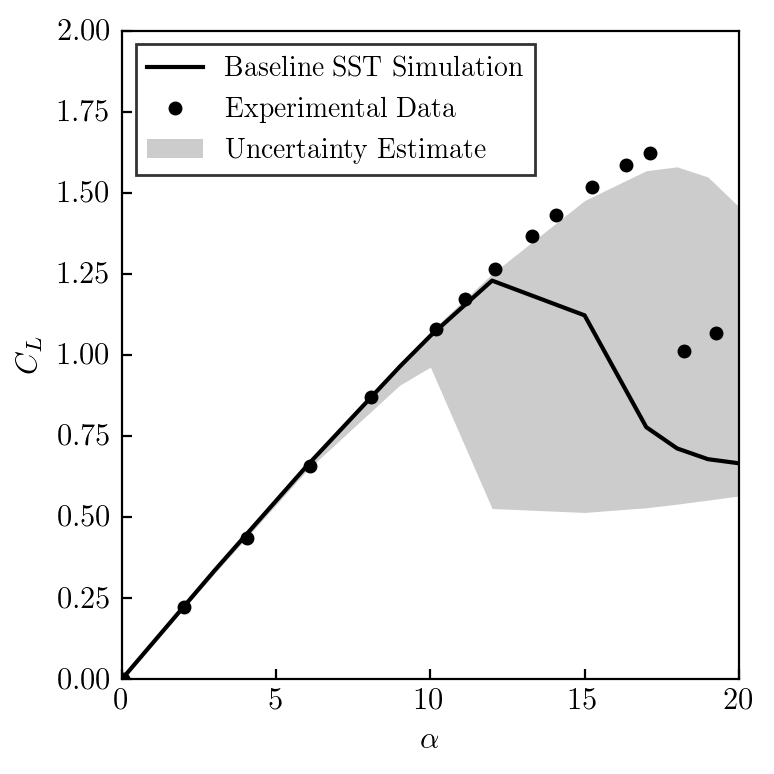

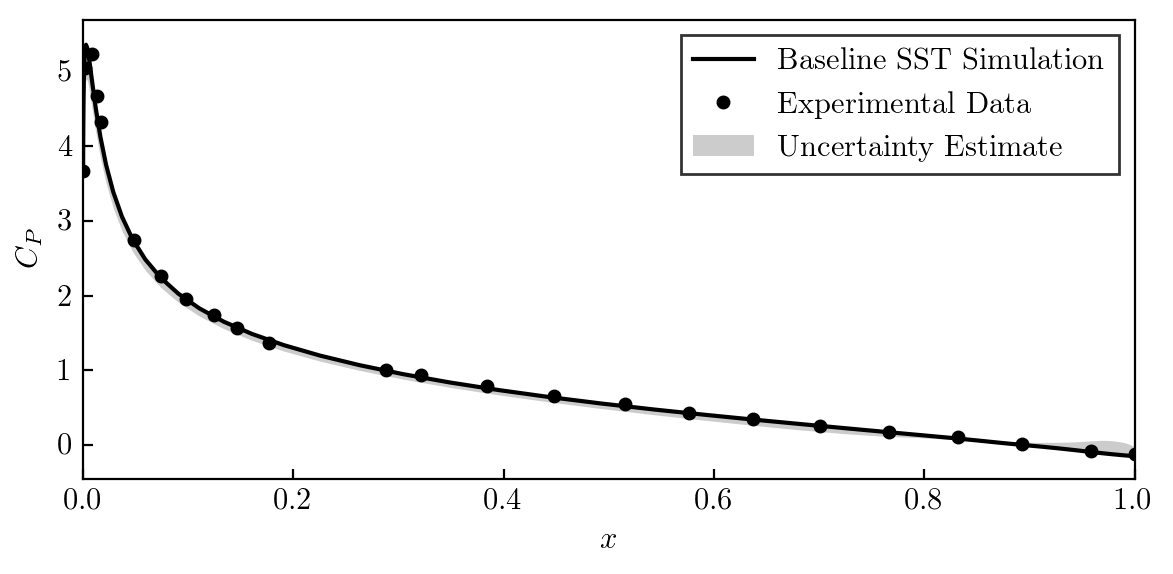

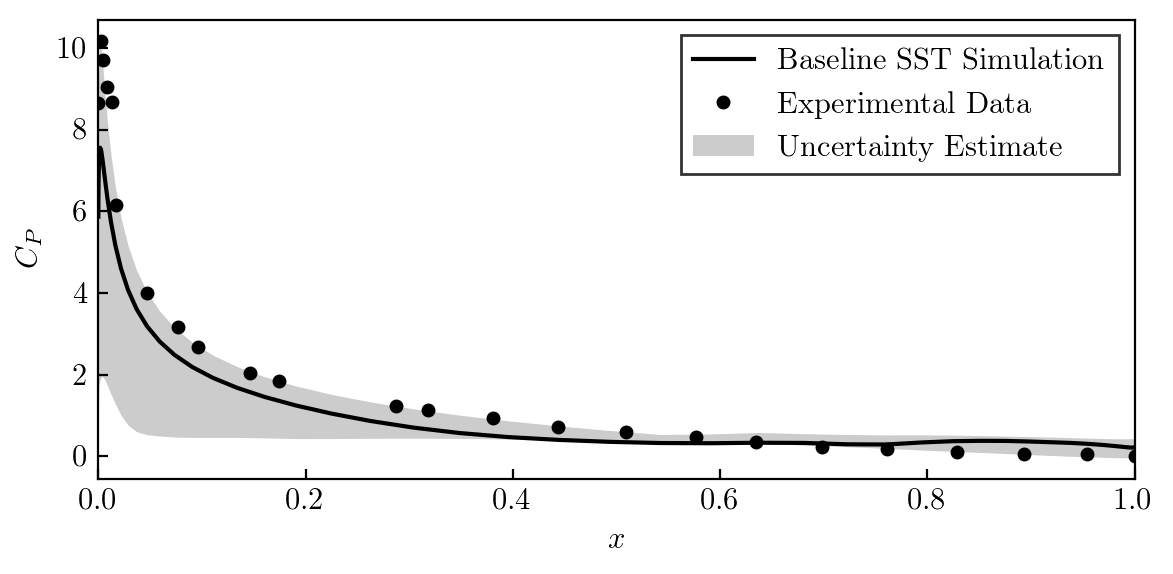

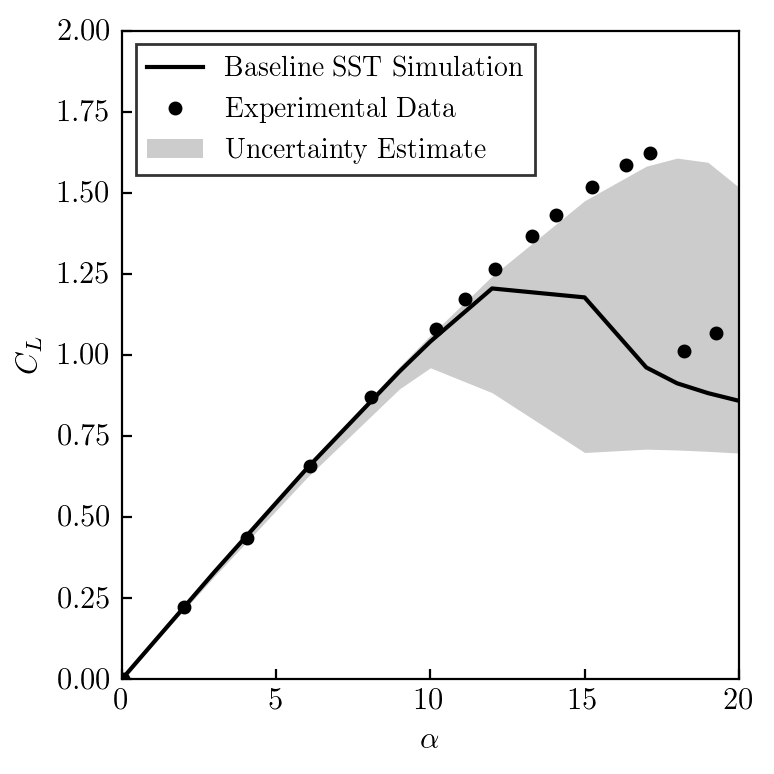

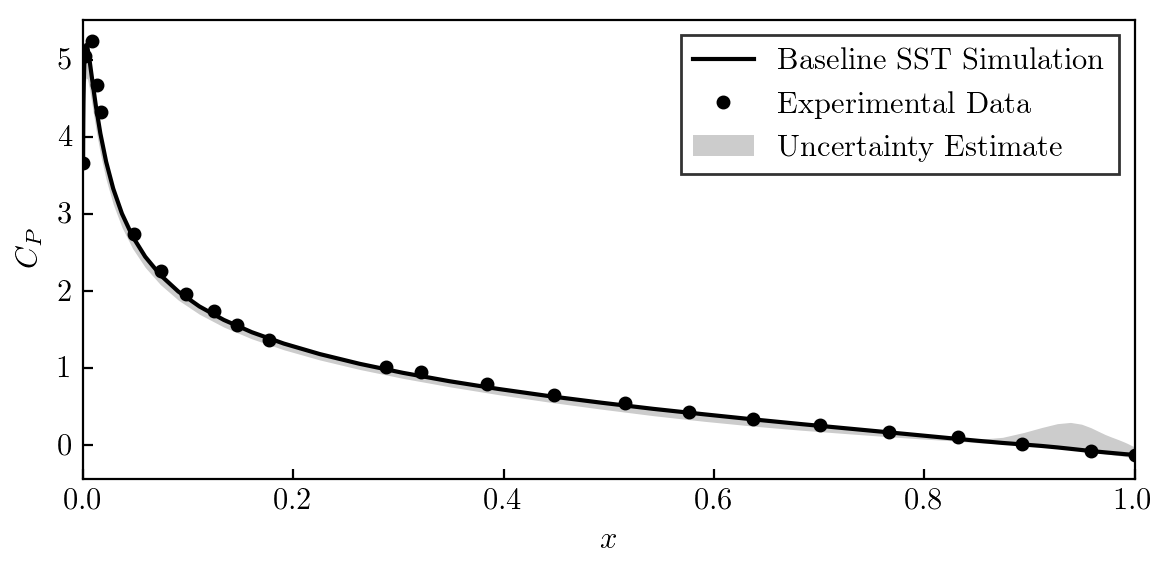

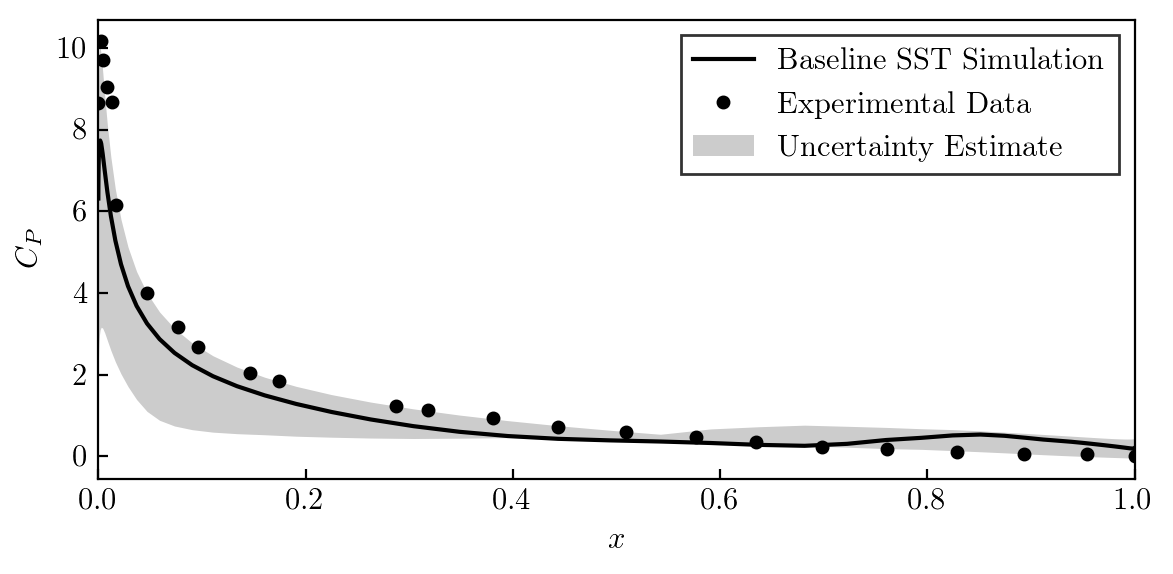

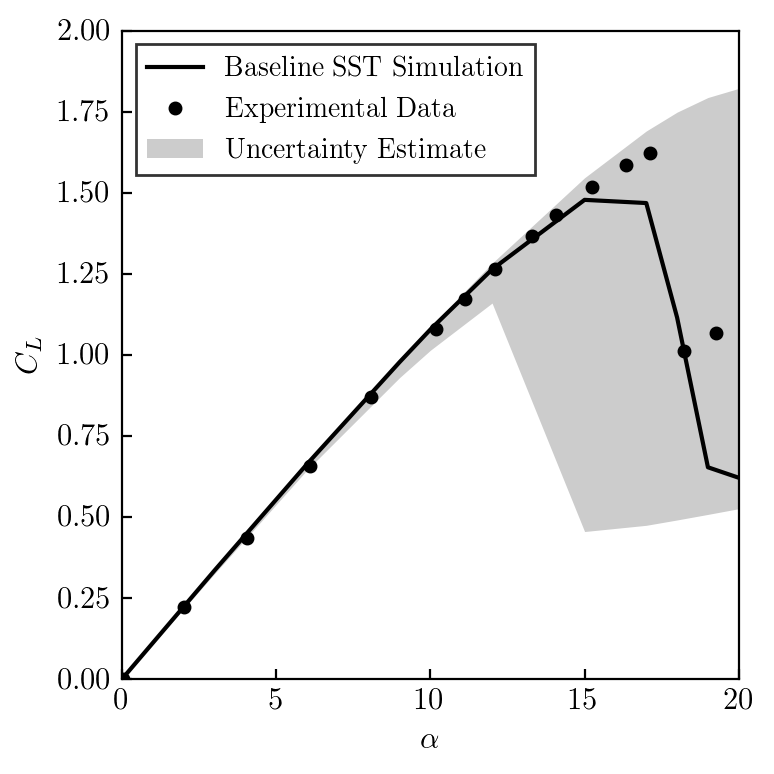

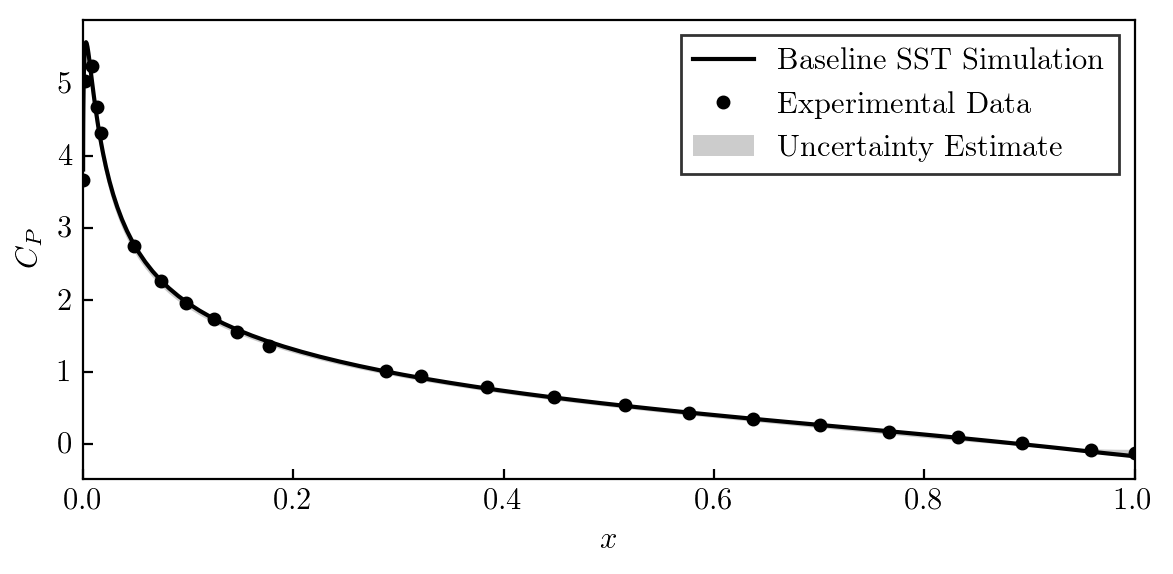

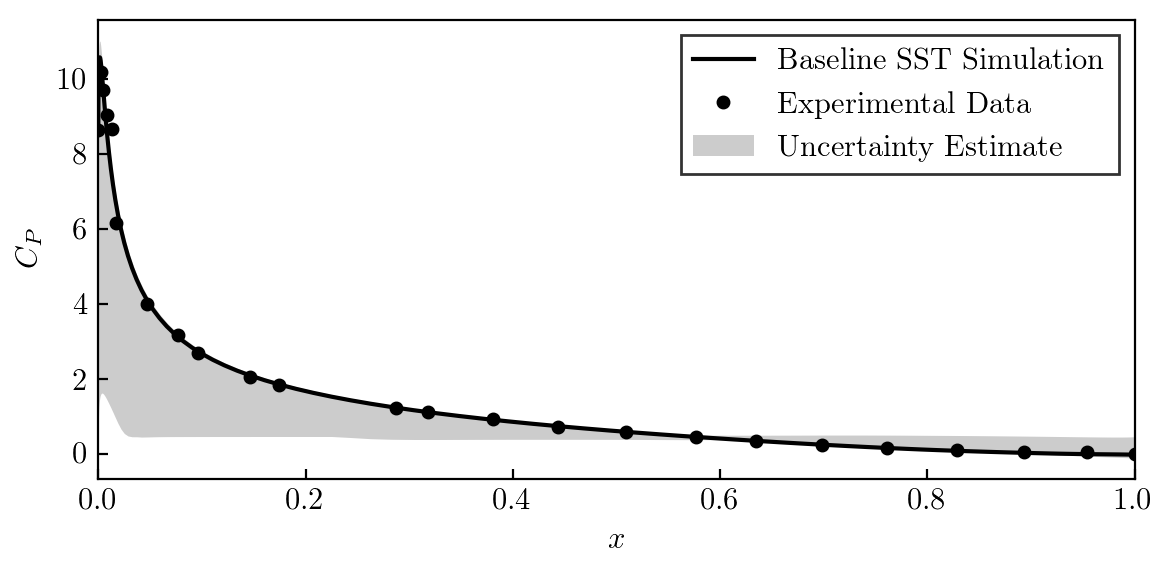

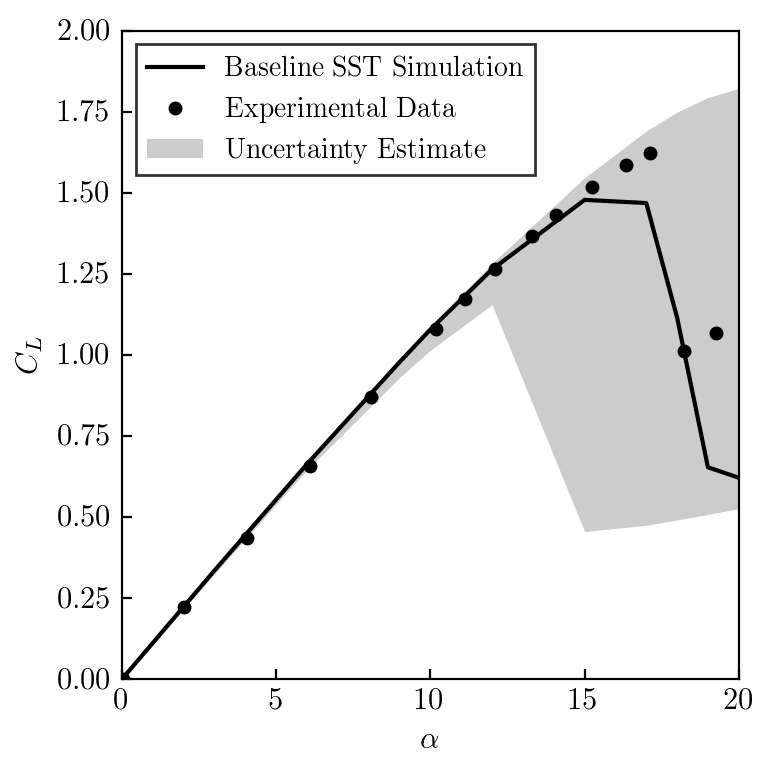

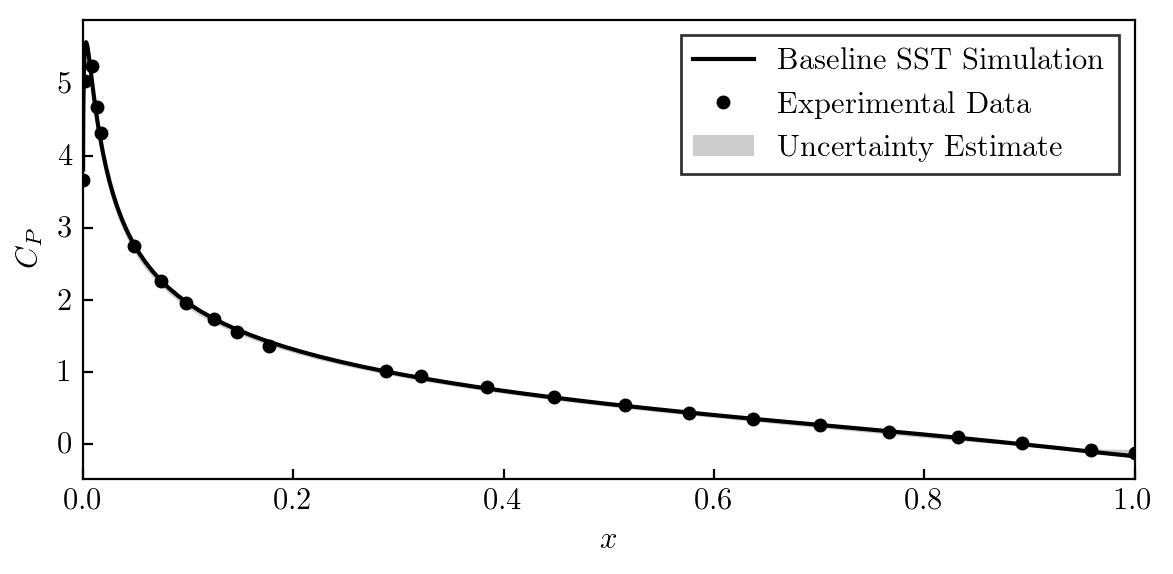

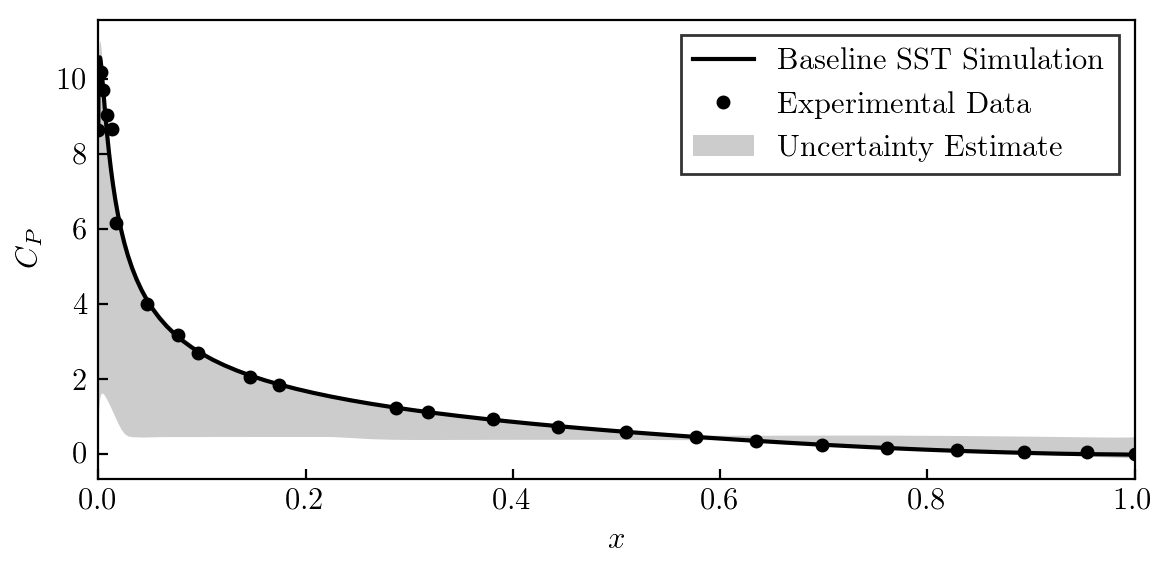

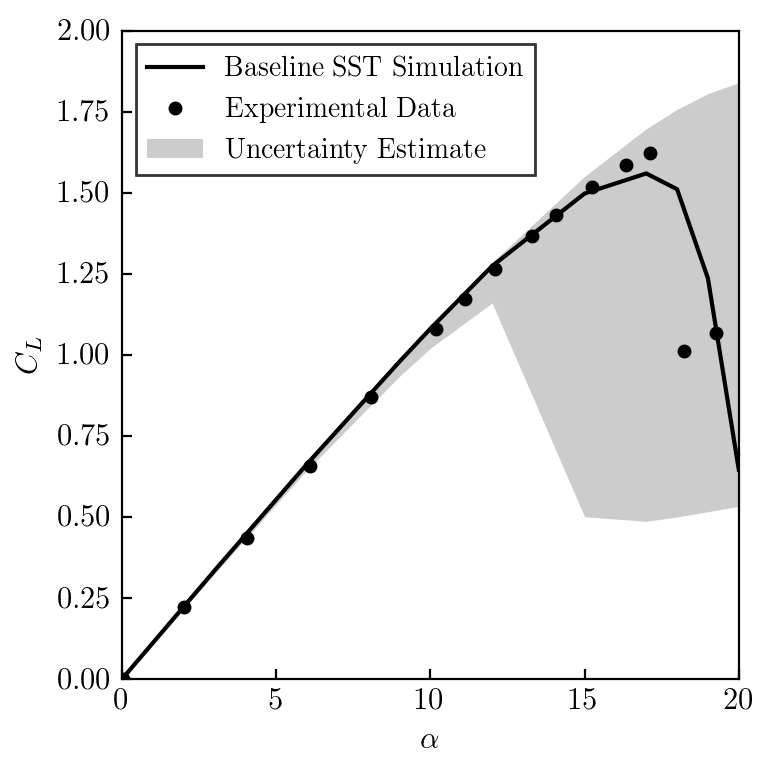

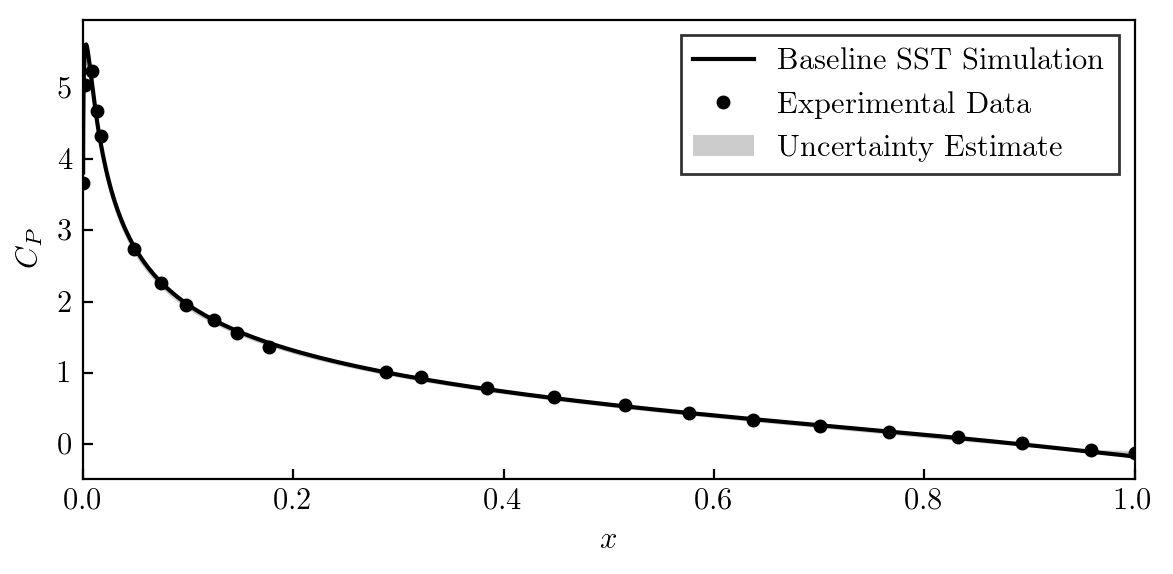

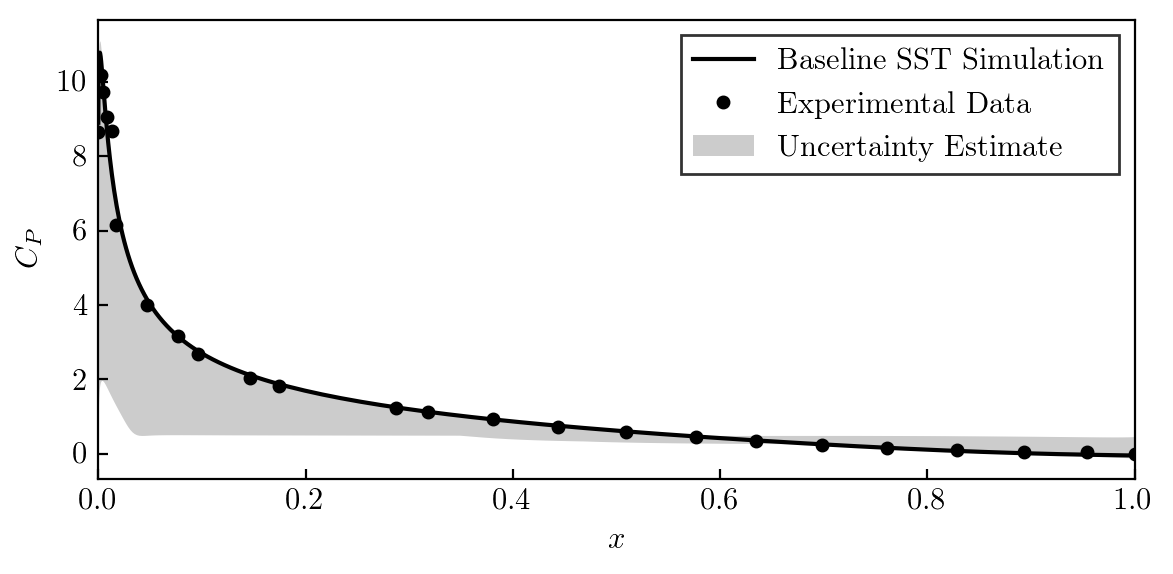

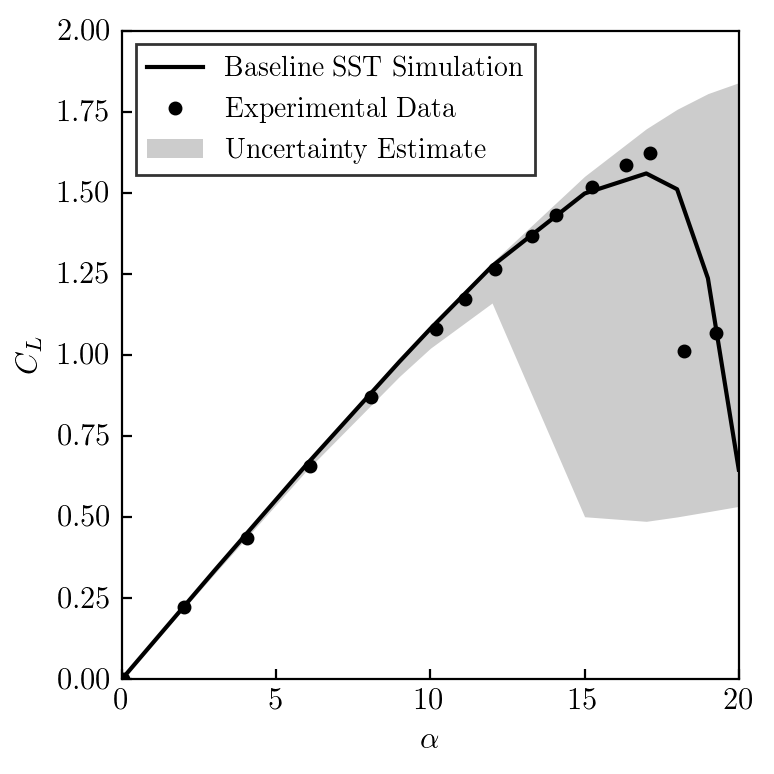

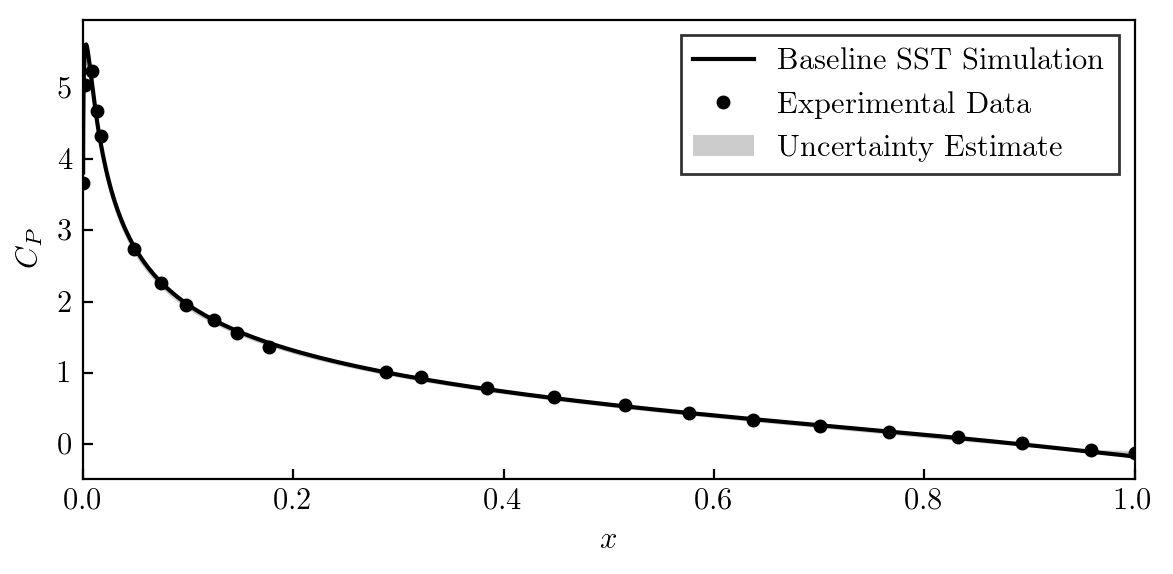

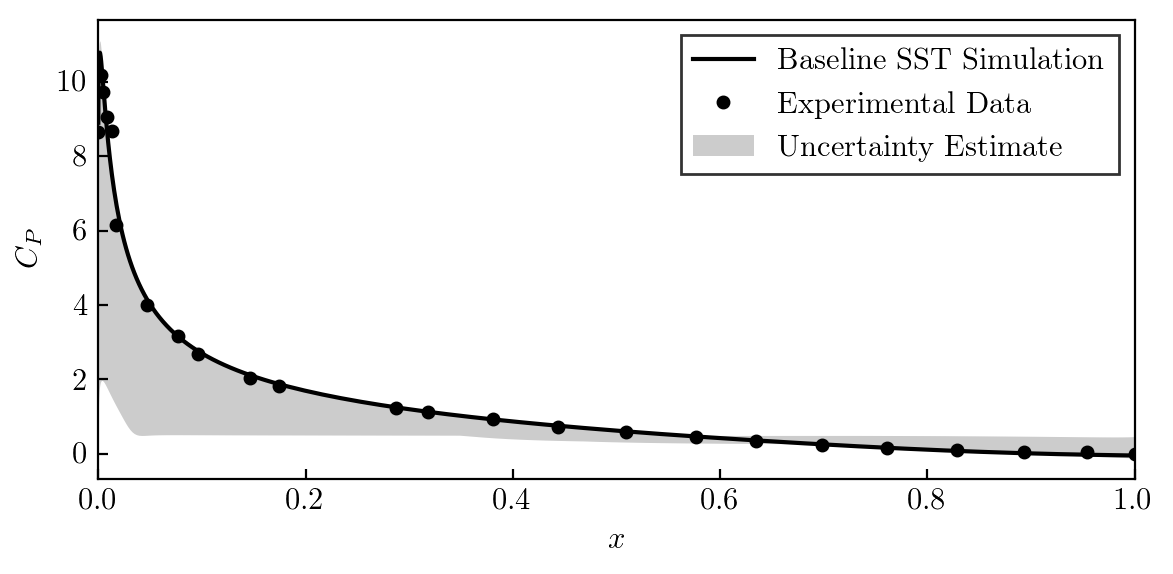

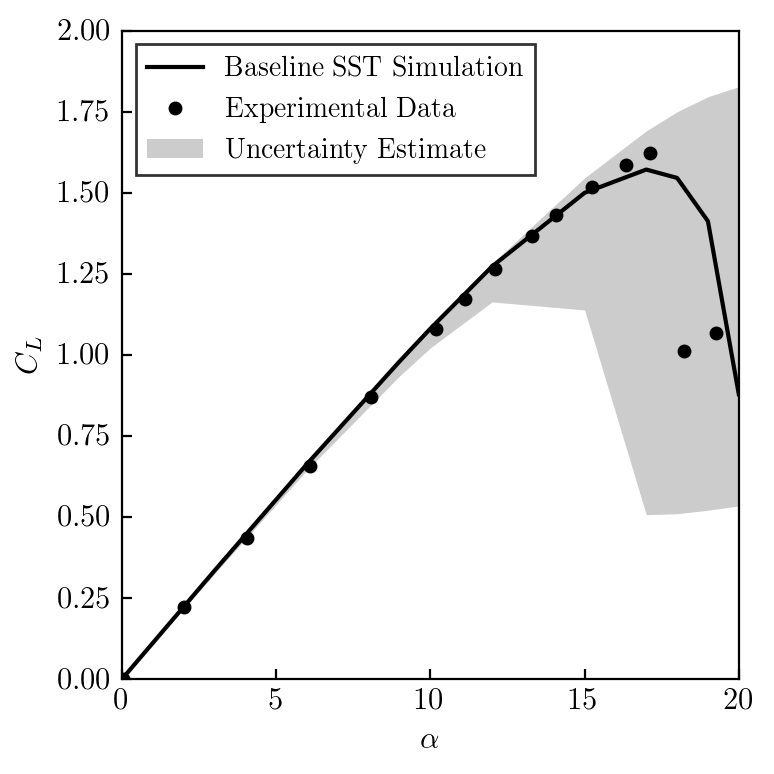

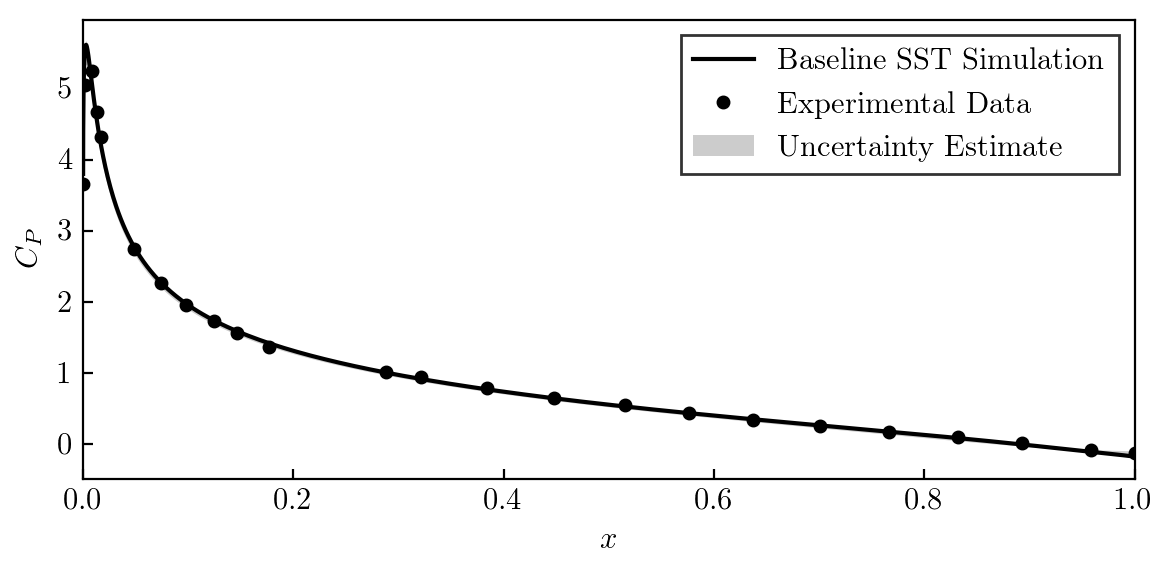

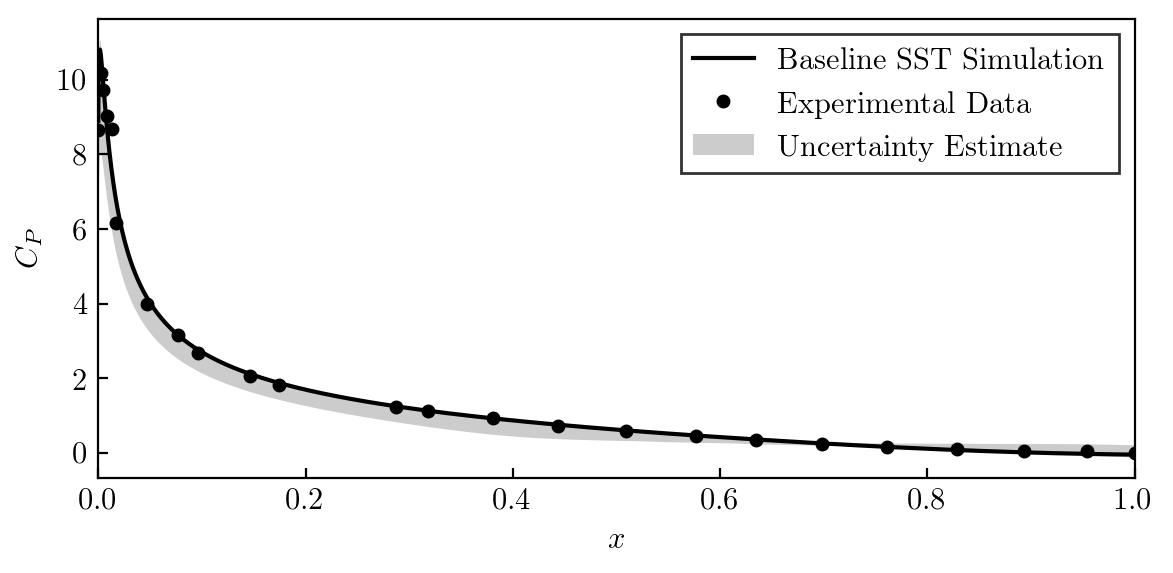

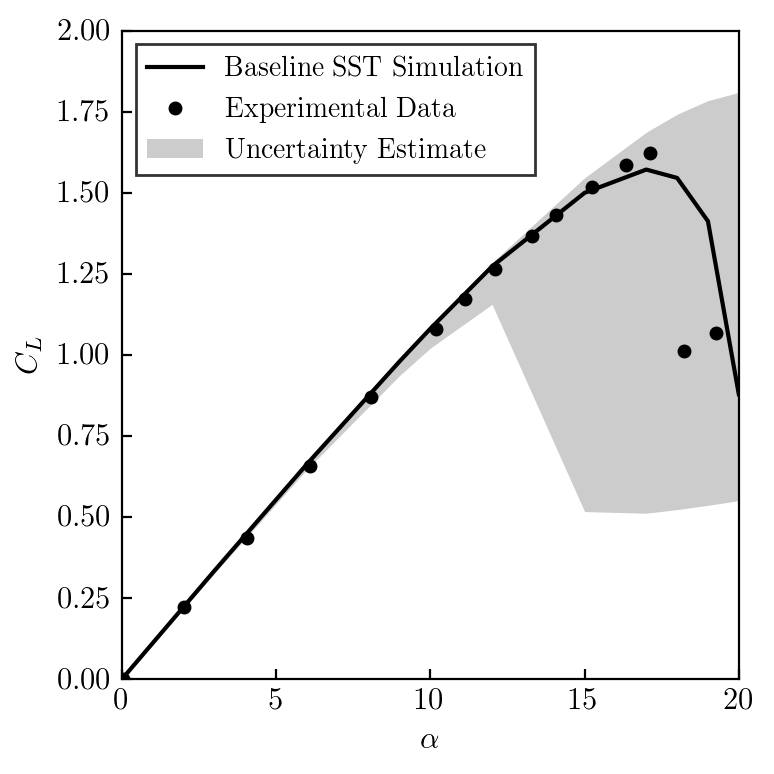

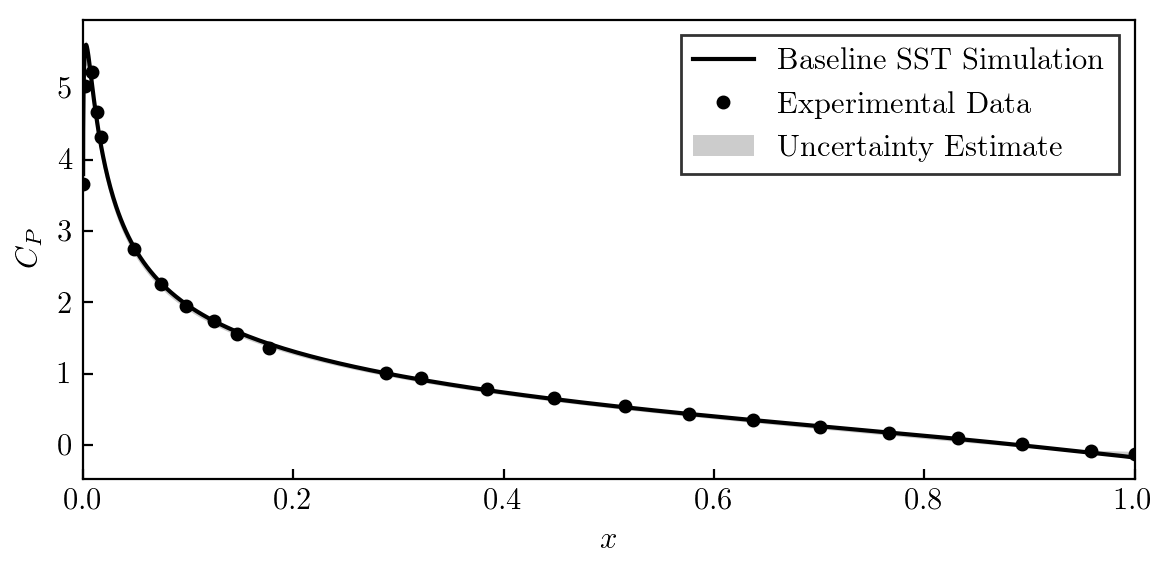

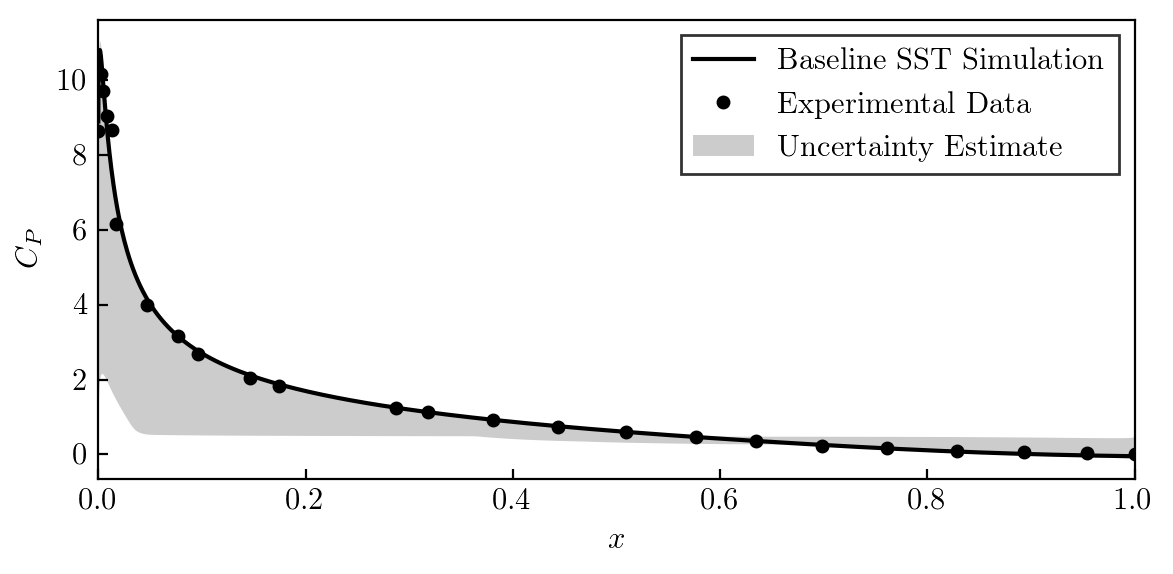

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from vandv_tools.pv import *

meshes= ["L6","L5","L4","L3"]
coeffs = ["CL"]
grads = [".",'least_squares']
folders= ["10aoa","15aoa"]
ylabels = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$'}

plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)

file_loc = '/home/jmukho/phd/phd_thesis/code/image_gen/naca0012/data/'
exp_vals = {}
exp_cp_data = {}
exp_data = np.loadtxt(file_loc + 'alpha_sweep_exp_data.txt')
exp_vals["AOA"] = exp_data[:,0]
exp_vals["CL"] = exp_data[:,1]
exp_vals["CD"] = exp_data[:,2]

for mesh in meshes:
    for grad in grads:
        for coeff in coeffs:
            if grad == '.':
                grad_name = '2nd_order'
            else:
                grad_name = 'ls'
            fn = file_loc + '{}_{}_{}_vs_alpha_uq.csv'.format(mesh,grad_name,coeff.lower())
            with open(fn) as f:
                header = f.readline()
            header = [h.strip() for h in header.split(',')]
            dtype=[]
            for var in header:
                dtype.append((var,np.float64))
            data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            
            plt.figure(figsize=(4,4))
            plt.plot(data['AOA'],data['Baseline'],color='black', label="Baseline SST Simulation")
            plt.plot(exp_vals["AOA"],exp_vals[coeff],marker='o',
                     lw=0.0,color="black", label="Experimental Data")
            plt.fill_between(data['AOA'],data['Max'],data['Min'],
                             alpha=0.2,color='black',lw=0,label="Uncertainty Estimate")
            plt.xlabel(r'$\alpha$')
            plt.ylabel(ylabels[coeff])
            plt.xlim((0,20))
            plt.ylim(0,2.0)
            plt.legend(loc='upper left',
                       frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False,fontsize=10)
            plt.tick_params(direction='in')
            plt.tight_layout()
            plt.savefig('images/' + '{}_{}_{}_vs_alpha_uq.png'.format(mesh,grad_name,coeff.lower()))
            
        for folder in folders:
            plt.figure(figsize=(6,3))
            exp_data = np.loadtxt(file_loc + folder + '_cpu.dat')
            exp_cp_data[folder] = {}
            exp_cp_data[folder]['X'] = exp_data[:,0]
            exp_cp_data[folder]['Pressure_Coefficient'] = -exp_data[:,1]
            
            fn = file_loc + '{}_{}_{}_cpu.csv'.format(mesh,grad_name,folder)
            with open(fn) as f:
                header = f.readline()
            header = [h.strip() for h in header.split(',')]
            dtype=[]
            for var in header:
                dtype.append((var,np.float64))
            data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            plt.plot(data['X'],data['Baseline'],color='black', label="Baseline SST Simulation")
            
            plt.plot(exp_cp_data[folder]['X'],exp_cp_data[folder]['Pressure_Coefficient'],
                     marker='o',lw=0.0,color="black", label="Experimental Data")
            plt.fill_between(data['X'],data['Max'],data['Min'],alpha=0.2,
                             color='black',lw=0,label="Uncertainty Estimate")
            plt.xlabel(r'$x$')
            plt.ylabel(r'$C_P$')
            plt.xlim((0,1.0))
            plt.legend(frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False)
            plt.tick_params(direction='in')
            plt.tight_layout()
            plt.savefig('images/' + '{}_{}_{}_cpu.png'.format(mesh,grad_name,folder))